In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.layers import Bidirectional, Conv1D, Dense, Flatten, LSTMCell, MaxPool1D, RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import time

In [2]:
start_time = time.time()

In [3]:
tensorflow.random.set_seed(1234)

In [4]:
DATASET_PATH = './dataset/processed_dataset/'
TENSORFLOW_SAVED_MODEL_PATH = './tensorflow_saved_models/'
IMAGE_PATH = './images/'

In [5]:
datasets = pd.concat([pd.read_csv(file) for file in glob.glob(DATASET_PATH + '*')])

In [6]:
datasets.head()

,50.0,71.75421209117937,93.50842418235877,115.26263627353815,137.01684836471753,158.7710604558969,180.52527254707638,202.2794846382557,224.0336967294351,245.78790882061452,...,21825.966303270565,21847.720515361747,21869.474727452925,21891.228939544104,21912.983151635282,21934.737363726465,21956.491575817643,21978.245787908818,22000.0,class
0,0.000801,0.001457,0.002129,0.002763,0.003370,0.003945,0.004515,0.005036,0.005538,0.005981,...,0.008532,0.008513,0.008491,0.008484,0.008457,0.008454,0.008432,0.008421,0.008423,nc1_ncn5121_no4
1,0.000827,0.001476,0.002096,0.002775,0.003362,0.003950,0.004512,0.005057,0.005534,0.005997,...,0.008506,0.008514,0.008490,0.008488,0.008481,0.008448,0.008445,0.008432,0.008418,nc1_ncn5121_no4
2,0.000770,0.001462,0.002094,0.002737,0.003353,0.003949,0.004500,0.005031,0.005541,0.005990,...,0.008520,0.008506,0.008494,0.008479,0.008482,0.008457,0.008447,0.008437,0.008416,nc1_ncn5121_no4
3,0.000819,0.001452,0.002100,0.002755,0.003370,0.003962,0.004510,0.005017,0.005528,0.005978,...,0.008524,0.008516,0.008474,0.008483,0.008479,0.008464,0.008442,0.008435,0.008425,nc1_ncn5121_no4
4,0.000884,0.001472,0.002113,0.002735,0.003354,0.003940,0.004498,0.005016,0.005539,0.005994,...,0.008494,0.008499,0.008505,0.008468,0.008469,0.008445,0.008433,0.008433,0.008388,nc1_ncn5121_no4


In [7]:
X = datasets.iloc[:, 0:1010]
y = datasets['class']

In [8]:
print(f'Dataset size: {len(X)}')

Dataset size: 5000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, train_size=0.70)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = list(y_train)
y_test = list(y_test)

input_shape = X_train.shape

In [10]:
print(f'Training dataset size: {len(X_train)}')
print(f'Test dataset size: {len(X_test)}')

Training dataset size: 3500
Test dataset size: 1500


In [11]:
NUMBER_OF_CLASSES = 10

In [12]:
class_mapping = {'nc1_ncn5121_no4': 0, 'nc1_ncn5121_no5': 1, 'nc1_switch_sl2': 2, 'nc1_switch_dem': 3, 'nc1_nodevice': 4,
                 'nc2_ncn5121_no4': 5, 'nc2_ncn5121_no5': 6, 'nc2_switch_sl2': 7, 'nc2_switch_dem': 8, 'nc2_nodevice': 9,}

In [13]:
classes = ['nc1_ncn5121_no4', 'nc1_ncn5121_no5', 'nc1_switch_sl2', 'nc1_switch_dem', 'nc1_nodevice', 'nc2_ncn5121_no4', 'nc2_ncn5121_no5', 'nc2_switch_sl2', 'nc2_switch_dem', 'nc2_nodevice']

In [14]:
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])

In [15]:
y_train = to_categorical(y_train, NUMBER_OF_CLASSES).astype('int32')
y_test = to_categorical(y_test, NUMBER_OF_CLASSES).astype('int32')

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
def CLSTMClassifier():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_shape[1], 1)))
    model.add(MaxPool1D(pool_size=2))
    model.add(Bidirectional(RNN(LSTMCell(32))))
    model.add(Flatten())
    model.add(Dense(100, input_shape=input_shape, activation='relu'))
    model.add(Dense(NUMBER_OF_CLASSES, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    return model

In [18]:
c_lstm = CLSTMClassifier()
c_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1008, 64)          256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 504, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 32,598
Trainable params: 32,598
Non-trainable params: 0
____________________________________________________

In [19]:
X_train_reshaped = np.reshape(X_train, (input_shape[0], input_shape[1], 1))
X_train_reshaped.shape

(3500, 1010, 1)

In [20]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_reshaped.shape

(1500, 1010, 1)

In [21]:
history_c_lstm = c_lstm.fit(X_train_reshaped, y_train, epochs=250, verbose=2, validation_split=0.2)

Epoch 1/250
88/88 - 40s - loss: 1.1556 - accuracy: 0.6164 - val_loss: 0.4091 - val_accuracy: 0.8900
Epoch 2/250
88/88 - 32s - loss: 0.2815 - accuracy: 0.8879 - val_loss: 0.2152 - val_accuracy: 0.9386
Epoch 3/250
88/88 - 32s - loss: 0.2087 - accuracy: 0.9196 - val_loss: 0.2112 - val_accuracy: 0.9043
Epoch 4/250
88/88 - 33s - loss: 0.1916 - accuracy: 0.9254 - val_loss: 0.1968 - val_accuracy: 0.9000
Epoch 5/250
88/88 - 32s - loss: 0.1540 - accuracy: 0.9414 - val_loss: 0.1643 - val_accuracy: 0.9357
Epoch 6/250
88/88 - 31s - loss: 0.1437 - accuracy: 0.9425 - val_loss: 0.1315 - val_accuracy: 0.9557
Epoch 7/250
88/88 - 31s - loss: 0.1310 - accuracy: 0.9454 - val_loss: 0.1275 - val_accuracy: 0.9571
Epoch 8/250
88/88 - 31s - loss: 0.1136 - accuracy: 0.9561 - val_loss: 0.1352 - val_accuracy: 0.9400
Epoch 9/250
88/88 - 31s - loss: 0.1164 - accuracy: 0.9546 - val_loss: 0.1196 - val_accuracy: 0.9500
Epoch 10/250
88/88 - 30s - loss: 0.0972 - accuracy: 0.9604 - val_loss: 0.0929 - val_accuracy: 0.9571

Epoch 83/250
88/88 - 31s - loss: 0.0474 - accuracy: 0.9793 - val_loss: 0.0288 - val_accuracy: 0.9871
Epoch 84/250
88/88 - 31s - loss: 0.0320 - accuracy: 0.9868 - val_loss: 0.0224 - val_accuracy: 0.9914
Epoch 85/250
88/88 - 31s - loss: 0.0370 - accuracy: 0.9850 - val_loss: 0.0290 - val_accuracy: 0.9857
Epoch 86/250
88/88 - 31s - loss: 0.0322 - accuracy: 0.9864 - val_loss: 0.0245 - val_accuracy: 0.9900
Epoch 87/250
88/88 - 31s - loss: 0.0307 - accuracy: 0.9864 - val_loss: 0.0292 - val_accuracy: 0.9886
Epoch 88/250
88/88 - 31s - loss: 0.0383 - accuracy: 0.9814 - val_loss: 0.0251 - val_accuracy: 0.9886
Epoch 89/250
88/88 - 31s - loss: 0.0321 - accuracy: 0.9846 - val_loss: 0.0288 - val_accuracy: 0.9871
Epoch 90/250
88/88 - 31s - loss: 0.0357 - accuracy: 0.9864 - val_loss: 0.1543 - val_accuracy: 0.9457
Epoch 91/250
88/88 - 31s - loss: 0.0363 - accuracy: 0.9839 - val_loss: 0.0246 - val_accuracy: 0.9886
Epoch 92/250
88/88 - 31s - loss: 0.0309 - accuracy: 0.9864 - val_loss: 0.0305 - val_accurac

Epoch 164/250
88/88 - 31s - loss: 0.0371 - accuracy: 0.9846 - val_loss: 0.0573 - val_accuracy: 0.9700
Epoch 165/250
88/88 - 31s - loss: 0.0288 - accuracy: 0.9882 - val_loss: 0.0173 - val_accuracy: 0.9943
Epoch 166/250
88/88 - 31s - loss: 0.0241 - accuracy: 0.9879 - val_loss: 0.0326 - val_accuracy: 0.9886
Epoch 167/250
88/88 - 32s - loss: 0.0252 - accuracy: 0.9896 - val_loss: 0.0681 - val_accuracy: 0.9757
Epoch 168/250
88/88 - 31s - loss: 0.0223 - accuracy: 0.9914 - val_loss: 0.0212 - val_accuracy: 0.9914
Epoch 169/250
88/88 - 31s - loss: 0.0150 - accuracy: 0.9939 - val_loss: 0.0167 - val_accuracy: 0.9929
Epoch 170/250
88/88 - 32s - loss: 0.0129 - accuracy: 0.9954 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 171/250
88/88 - 32s - loss: 0.0271 - accuracy: 0.9893 - val_loss: 0.0072 - val_accuracy: 0.9986
Epoch 172/250
88/88 - 32s - loss: 0.0088 - accuracy: 0.9979 - val_loss: 0.0184 - val_accuracy: 0.9957
Epoch 173/250
88/88 - 31s - loss: 0.0166 - accuracy: 0.9932 - val_loss: 0.0809 - v

Epoch 242/250
88/88 - 30s - loss: 1.3518e-05 - accuracy: 1.0000 - val_loss: 1.8311e-05 - val_accuracy: 1.0000
Epoch 243/250
88/88 - 31s - loss: 1.2771e-05 - accuracy: 1.0000 - val_loss: 1.7343e-05 - val_accuracy: 1.0000
Epoch 244/250
88/88 - 30s - loss: 1.1966e-05 - accuracy: 1.0000 - val_loss: 1.5877e-05 - val_accuracy: 1.0000
Epoch 245/250
88/88 - 30s - loss: 1.1252e-05 - accuracy: 1.0000 - val_loss: 1.4919e-05 - val_accuracy: 1.0000
Epoch 246/250
88/88 - 32s - loss: 1.0496e-05 - accuracy: 1.0000 - val_loss: 1.4706e-05 - val_accuracy: 1.0000
Epoch 247/250
88/88 - 31s - loss: 9.7792e-06 - accuracy: 1.0000 - val_loss: 1.3306e-05 - val_accuracy: 1.0000
Epoch 248/250
88/88 - 31s - loss: 9.3415e-06 - accuracy: 1.0000 - val_loss: 1.3014e-05 - val_accuracy: 1.0000
Epoch 249/250
88/88 - 32s - loss: 8.7276e-06 - accuracy: 1.0000 - val_loss: 1.1861e-05 - val_accuracy: 1.0000
Epoch 250/250
88/88 - 31s - loss: 8.3576e-06 - accuracy: 1.0000 - val_loss: 1.1403e-05 - val_accuracy: 1.0000


In [22]:
 def get_report(model):
    pred = model.predict(X_test_reshaped)
    predictions = (pred > 0.5).astype("int32")
    print(classification_report(y_test, predictions, target_names=classes))
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions,  average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    return accuracy, precision, recall, f1, predictions

In [23]:
c_lstm_score = get_report(c_lstm)
predictions = c_lstm_score[4]
print(f'Accuracy: {c_lstm_score[0]}')
print(f'Precision: {c_lstm_score[1]}')
print(f'Recall: {c_lstm_score[2]}')
print(f'F1-Score: {c_lstm_score[3]}')

                 precision    recall  f1-score   support

nc1_ncn5121_no4       1.00      1.00      1.00       150
nc1_ncn5121_no5       1.00      1.00      1.00       150
 nc1_switch_sl2       1.00      1.00      1.00       150
 nc1_switch_dem       1.00      1.00      1.00       150
   nc1_nodevice       1.00      1.00      1.00       150
nc2_ncn5121_no4       1.00      1.00      1.00       150
nc2_ncn5121_no5       1.00      1.00      1.00       150
 nc2_switch_sl2       1.00      1.00      1.00       150
 nc2_switch_dem       1.00      1.00      1.00       150
   nc2_nodevice       1.00      1.00      1.00       150

      micro avg       1.00      1.00      1.00      1500
      macro avg       1.00      1.00      1.00      1500
   weighted avg       1.00      1.00      1.00      1500
    samples avg       1.00      1.00      1.00      1500

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


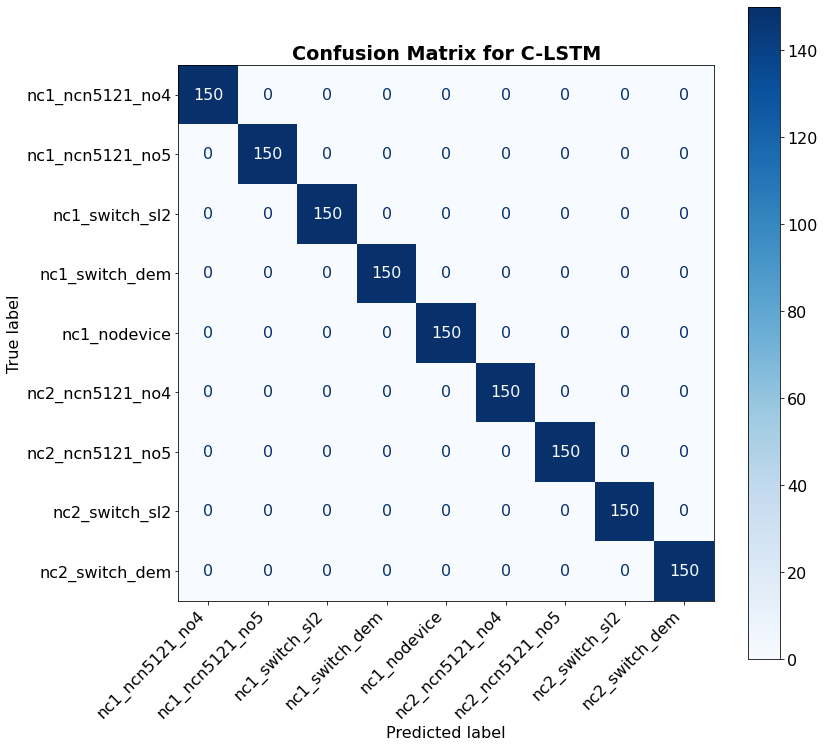

In [24]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(12, 12))
fig.tight_layout()
ax = fig.add_subplot(111)
plt.title('Confusion Matrix for C-LSTM', fontweight='bold')

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), labels=range(9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(ax=ax, cmap='Blues', values_format='')
plt.xticks(rotation=45, ha='right')

plt.savefig(IMAGE_PATH + 'c_lstm_confusion_matrix.pdf', bbox_inches='tight')

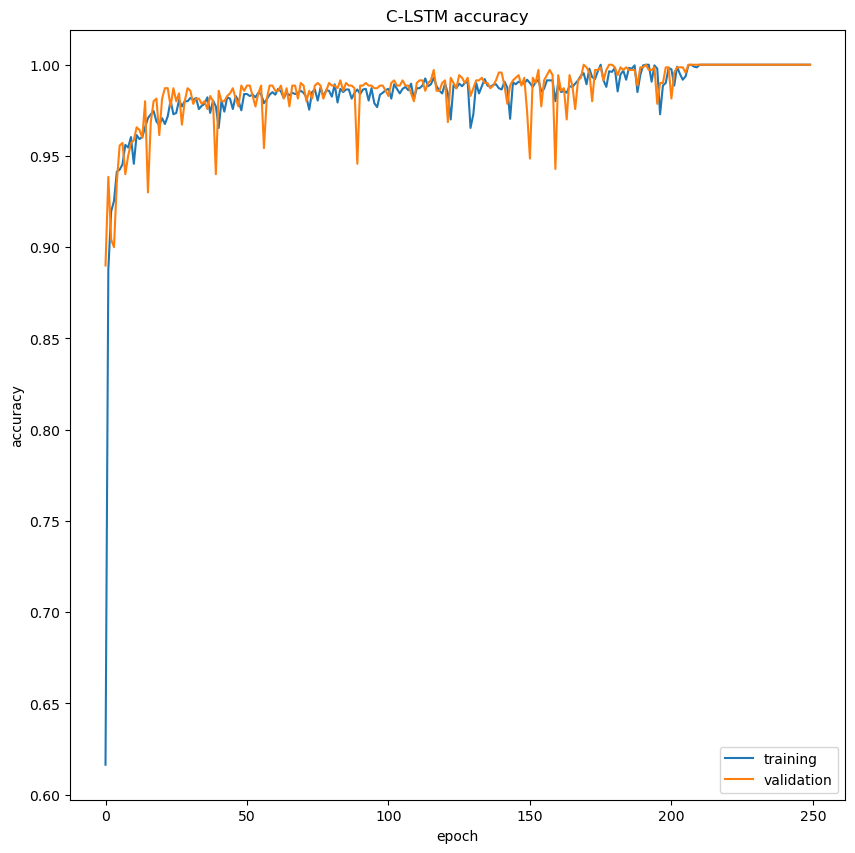

In [25]:
plt.rcdefaults()
fig = plt.figure(figsize=(10, 10))

plt.plot(history_c_lstm.history['accuracy'])
plt.plot(history_c_lstm.history['val_accuracy'])
plt.title('C-LSTM accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')

plt.savefig(IMAGE_PATH + 'c_lstm_accuracy.pdf', bbox_inches='tight')

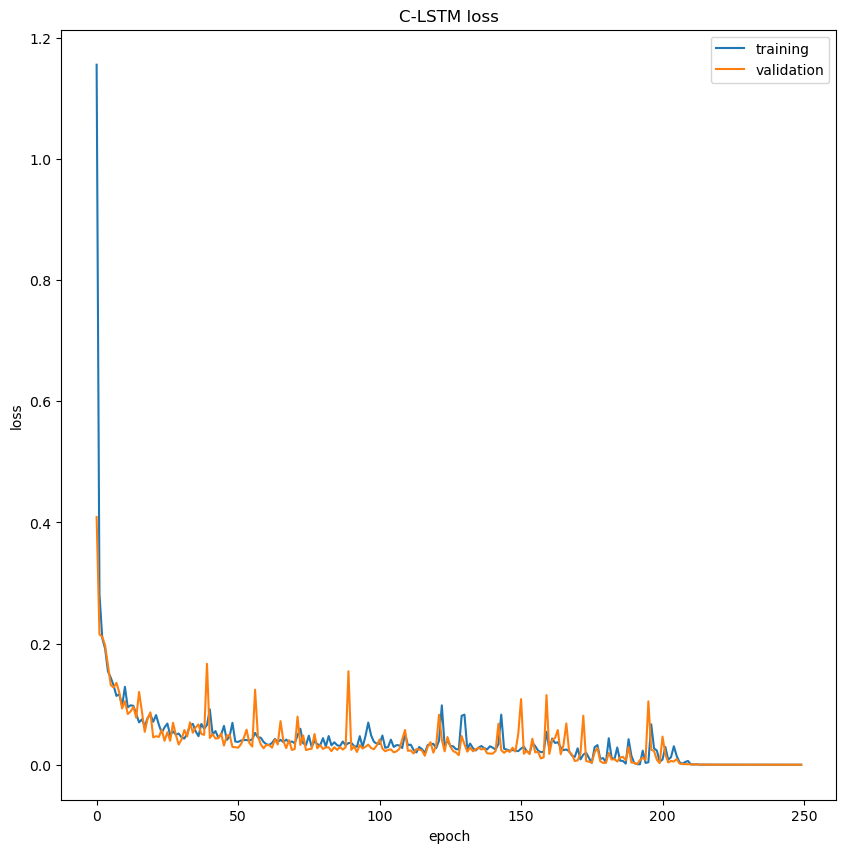

In [26]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history_c_lstm.history['loss'])
plt.plot(history_c_lstm.history['val_loss'])
plt.title('C-LSTM loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')

plt.savefig(IMAGE_PATH + 'c_lstm_loss.pdf', bbox_inches='tight')

# Save TensorFlow Model

In [27]:
c_lstm.save(TENSORFLOW_SAVED_MODEL_PATH + 'c_lstm_saved_model')

INFO:tensorflow:Assets written to: ./tensorflow_saved_models/c_lstm_saved_model\assets


In [28]:
print(history_c_lstm.history['accuracy'])

[0.616428554058075, 0.8878571391105652, 0.9196428656578064, 0.9253571629524231, 0.941428542137146, 0.9424999952316284, 0.9453571438789368, 0.9560714364051819, 0.9546428322792053, 0.960357129573822, 0.9457142949104309, 0.9614285826683044, 0.9592857360839844, 0.960357129573822, 0.9657142758369446, 0.970714271068573, 0.9728571176528931, 0.9746428728103638, 0.9689285755157471, 0.966785728931427, 0.970714271068573, 0.9674999713897705, 0.9717857241630554, 0.9803571701049805, 0.9728571176528931, 0.9735714197158813, 0.9807142615318298, 0.977142870426178, 0.9800000190734863, 0.9800000190734863, 0.9817857146263123, 0.9807142615318298, 0.9817857146263123, 0.9757142663002014, 0.9775000214576721, 0.9785714149475098, 0.9821428656578064, 0.9735714197158813, 0.9803571701049805, 0.977142870426178, 0.9653571248054504, 0.9803571701049805, 0.9742857217788696, 0.9821428656578064, 0.9814285635948181, 0.9757142663002014, 0.9828571677207947, 0.9803571701049805, 0.9750000238418579, 0.9839285612106323, 0.983928

In [29]:
print(history_c_lstm.history['val_accuracy'])

[0.8899999856948853, 0.9385714530944824, 0.904285728931427, 0.8999999761581421, 0.9357143044471741, 0.9557142853736877, 0.9571428298950195, 0.9399999976158142, 0.949999988079071, 0.9571428298950195, 0.9585714340209961, 0.9657142758369446, 0.9642857313156128, 0.9599999785423279, 0.9800000190734863, 0.9300000071525574, 0.9685714244842529, 0.9800000190734863, 0.9814285635948181, 0.9614285826683044, 0.9814285635948181, 0.9871428608894348, 0.9871428608894348, 0.977142870426178, 0.9871428608894348, 0.9800000190734863, 0.9842857122421265, 0.9671428799629211, 0.9800000190734863, 0.9871428608894348, 0.9857142567634583, 0.9785714149475098, 0.9814285635948181, 0.9814285635948181, 0.9785714149475098, 0.9800000190734863, 0.9757142663002014, 0.9828571677207947, 0.9800000190734863, 0.9399999976158142, 0.9857142567634583, 0.9800000190734863, 0.9800000190734863, 0.9828571677207947, 0.9842857122421265, 0.9871428608894348, 0.9814285635948181, 0.977142870426178, 0.9885714054107666, 0.9857142567634583, 0.9

In [30]:
print(history_c_lstm.history['loss'])

[1.155606746673584, 0.28153273463249207, 0.20874175429344177, 0.1916336864233017, 0.1539660394191742, 0.14369529485702515, 0.13095341622829437, 0.11361423134803772, 0.11637471616268158, 0.0971791073679924, 0.12857621908187866, 0.09467638283967972, 0.09812936931848526, 0.0971599668264389, 0.0835193544626236, 0.06992576271295547, 0.07492280006408691, 0.0635889396071434, 0.07694140076637268, 0.08307605981826782, 0.07082314789295197, 0.0819699838757515, 0.06599362194538116, 0.052885960787534714, 0.06160230189561844, 0.06799238175153732, 0.048622533679008484, 0.05515149235725403, 0.04964442178606987, 0.05148374289274216, 0.04524251073598862, 0.04321340471506119, 0.05136809125542641, 0.06500671058893204, 0.06746822595596313, 0.0551094152033329, 0.04706074297428131, 0.06732591241598129, 0.05935446172952652, 0.06567874550819397, 0.09152447432279587, 0.04986158013343811, 0.05555525794625282, 0.045001596212387085, 0.0493466779589653, 0.0641508623957634, 0.0408705398440361, 0.04686528444290161, 0

In [31]:
print(history_c_lstm.history['val_loss'])

[0.4090518057346344, 0.2151632308959961, 0.21119266748428345, 0.19683323800563812, 0.1643258035182953, 0.13151226937770844, 0.12748543918132782, 0.13520754873752594, 0.11961473524570465, 0.09287197887897491, 0.10491856932640076, 0.08372705429792404, 0.0879034474492073, 0.09560657292604446, 0.0775035172700882, 0.12015418708324432, 0.08792640268802643, 0.05422592535614967, 0.07577133923768997, 0.08647356182336807, 0.04518665745854378, 0.04707974195480347, 0.04588969796895981, 0.05785146355628967, 0.03947693854570389, 0.05358820781111717, 0.039486899971961975, 0.06931234896183014, 0.04926375299692154, 0.03336542844772339, 0.04158015921711922, 0.05730639398097992, 0.046663980931043625, 0.06994213163852692, 0.052816297858953476, 0.06160854175686836, 0.06651563942432404, 0.05088150128722191, 0.04925530031323433, 0.16664621233940125, 0.04420921951532364, 0.05045352503657341, 0.04326166585087776, 0.043741386383771896, 0.05154610052704811, 0.03170771896839142, 0.047754935920238495, 0.0496790967

In [32]:
print(f'Execution time: {time.time() - start_time} s')

Execution time: 7737.777821063995 s
